<a href="https://colab.research.google.com/github/KamalSPadiyar/Weather_prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:

import pandas as pd
df = pd.read_csv('/content/seattle-weather.csv')


In [8]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [9]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [10]:
df.duplicated().sum()

0

In [11]:
#coulmn Open converted into numpy array
training_set = df.iloc[:,2:3].values
training_set

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

In [12]:
len(training_set)

1461

In [13]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i,0])
    y_train.append(training_set[i,0])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

In [14]:
WINDOW = 10
X,y = df_to_XY(df,WINDOW)
print(len(X),len(y))
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
x_test = y[1000:]

1451 1451


In [15]:
#Reshaping(To add new dimensions)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [16]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [17]:
regressor = Sequential()

In [18]:
#Addinf the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
#Compiling
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [21]:
#fitting the rnn to the training set
history=regressor.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - loss: 234.9695 - val_loss: 238.8539
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 100.0361 - val_loss: 161.0439
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 78.2159 - val_loss: 133.1307
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 62.4561 - val_loss: 115.2676
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 58.0895 - val_loss: 102.1471
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 60.6783 - val_loss: 93.1025
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 56.5031 - val_loss: 86.9085
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 56.3547 - val_loss: 82.6215
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 54.1235 - val_loss: 79.5229
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 59.4927 - val_loss: 77.8069
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 52.6310 - val_loss: 77.8996
Epoch 12/100
25/25 ━━━━

In [22]:
his = pd.DataFrame(history.history)

In [23]:
his.head()

,loss,val_loss
0,196.460220,238.853851
1,91.653122,161.043900
2,70.914825,133.130661
3,62.513805,115.267639
4,57.832890,102.147087


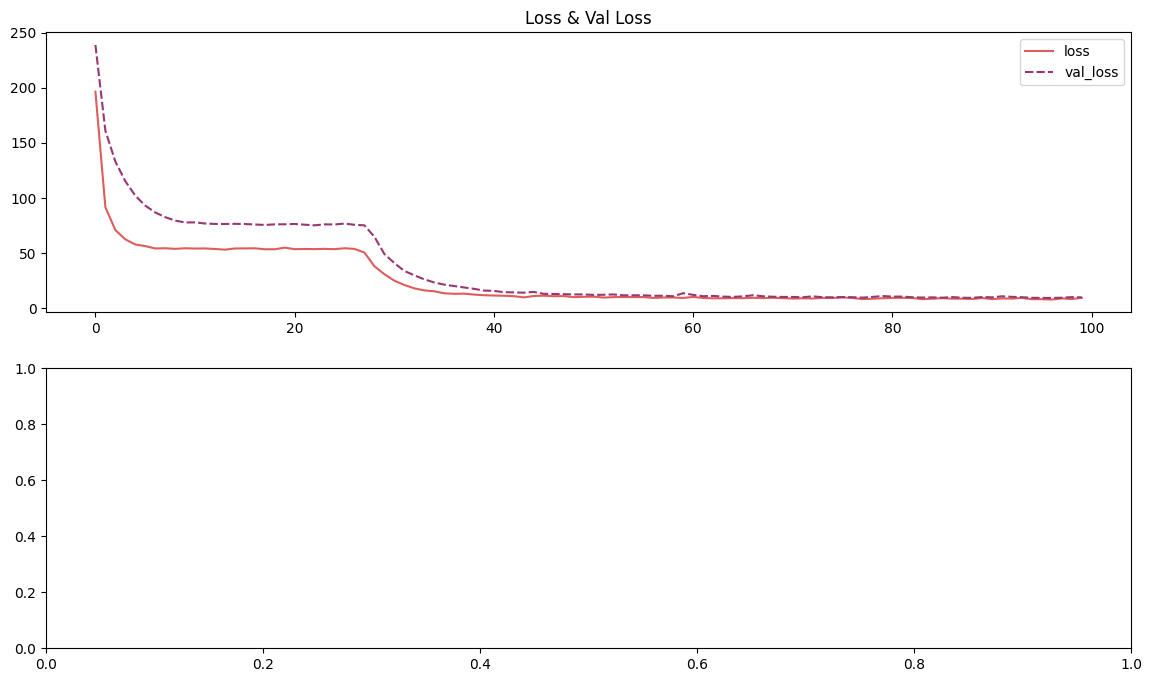

In [24]:
import seaborn as sns
his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [25]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


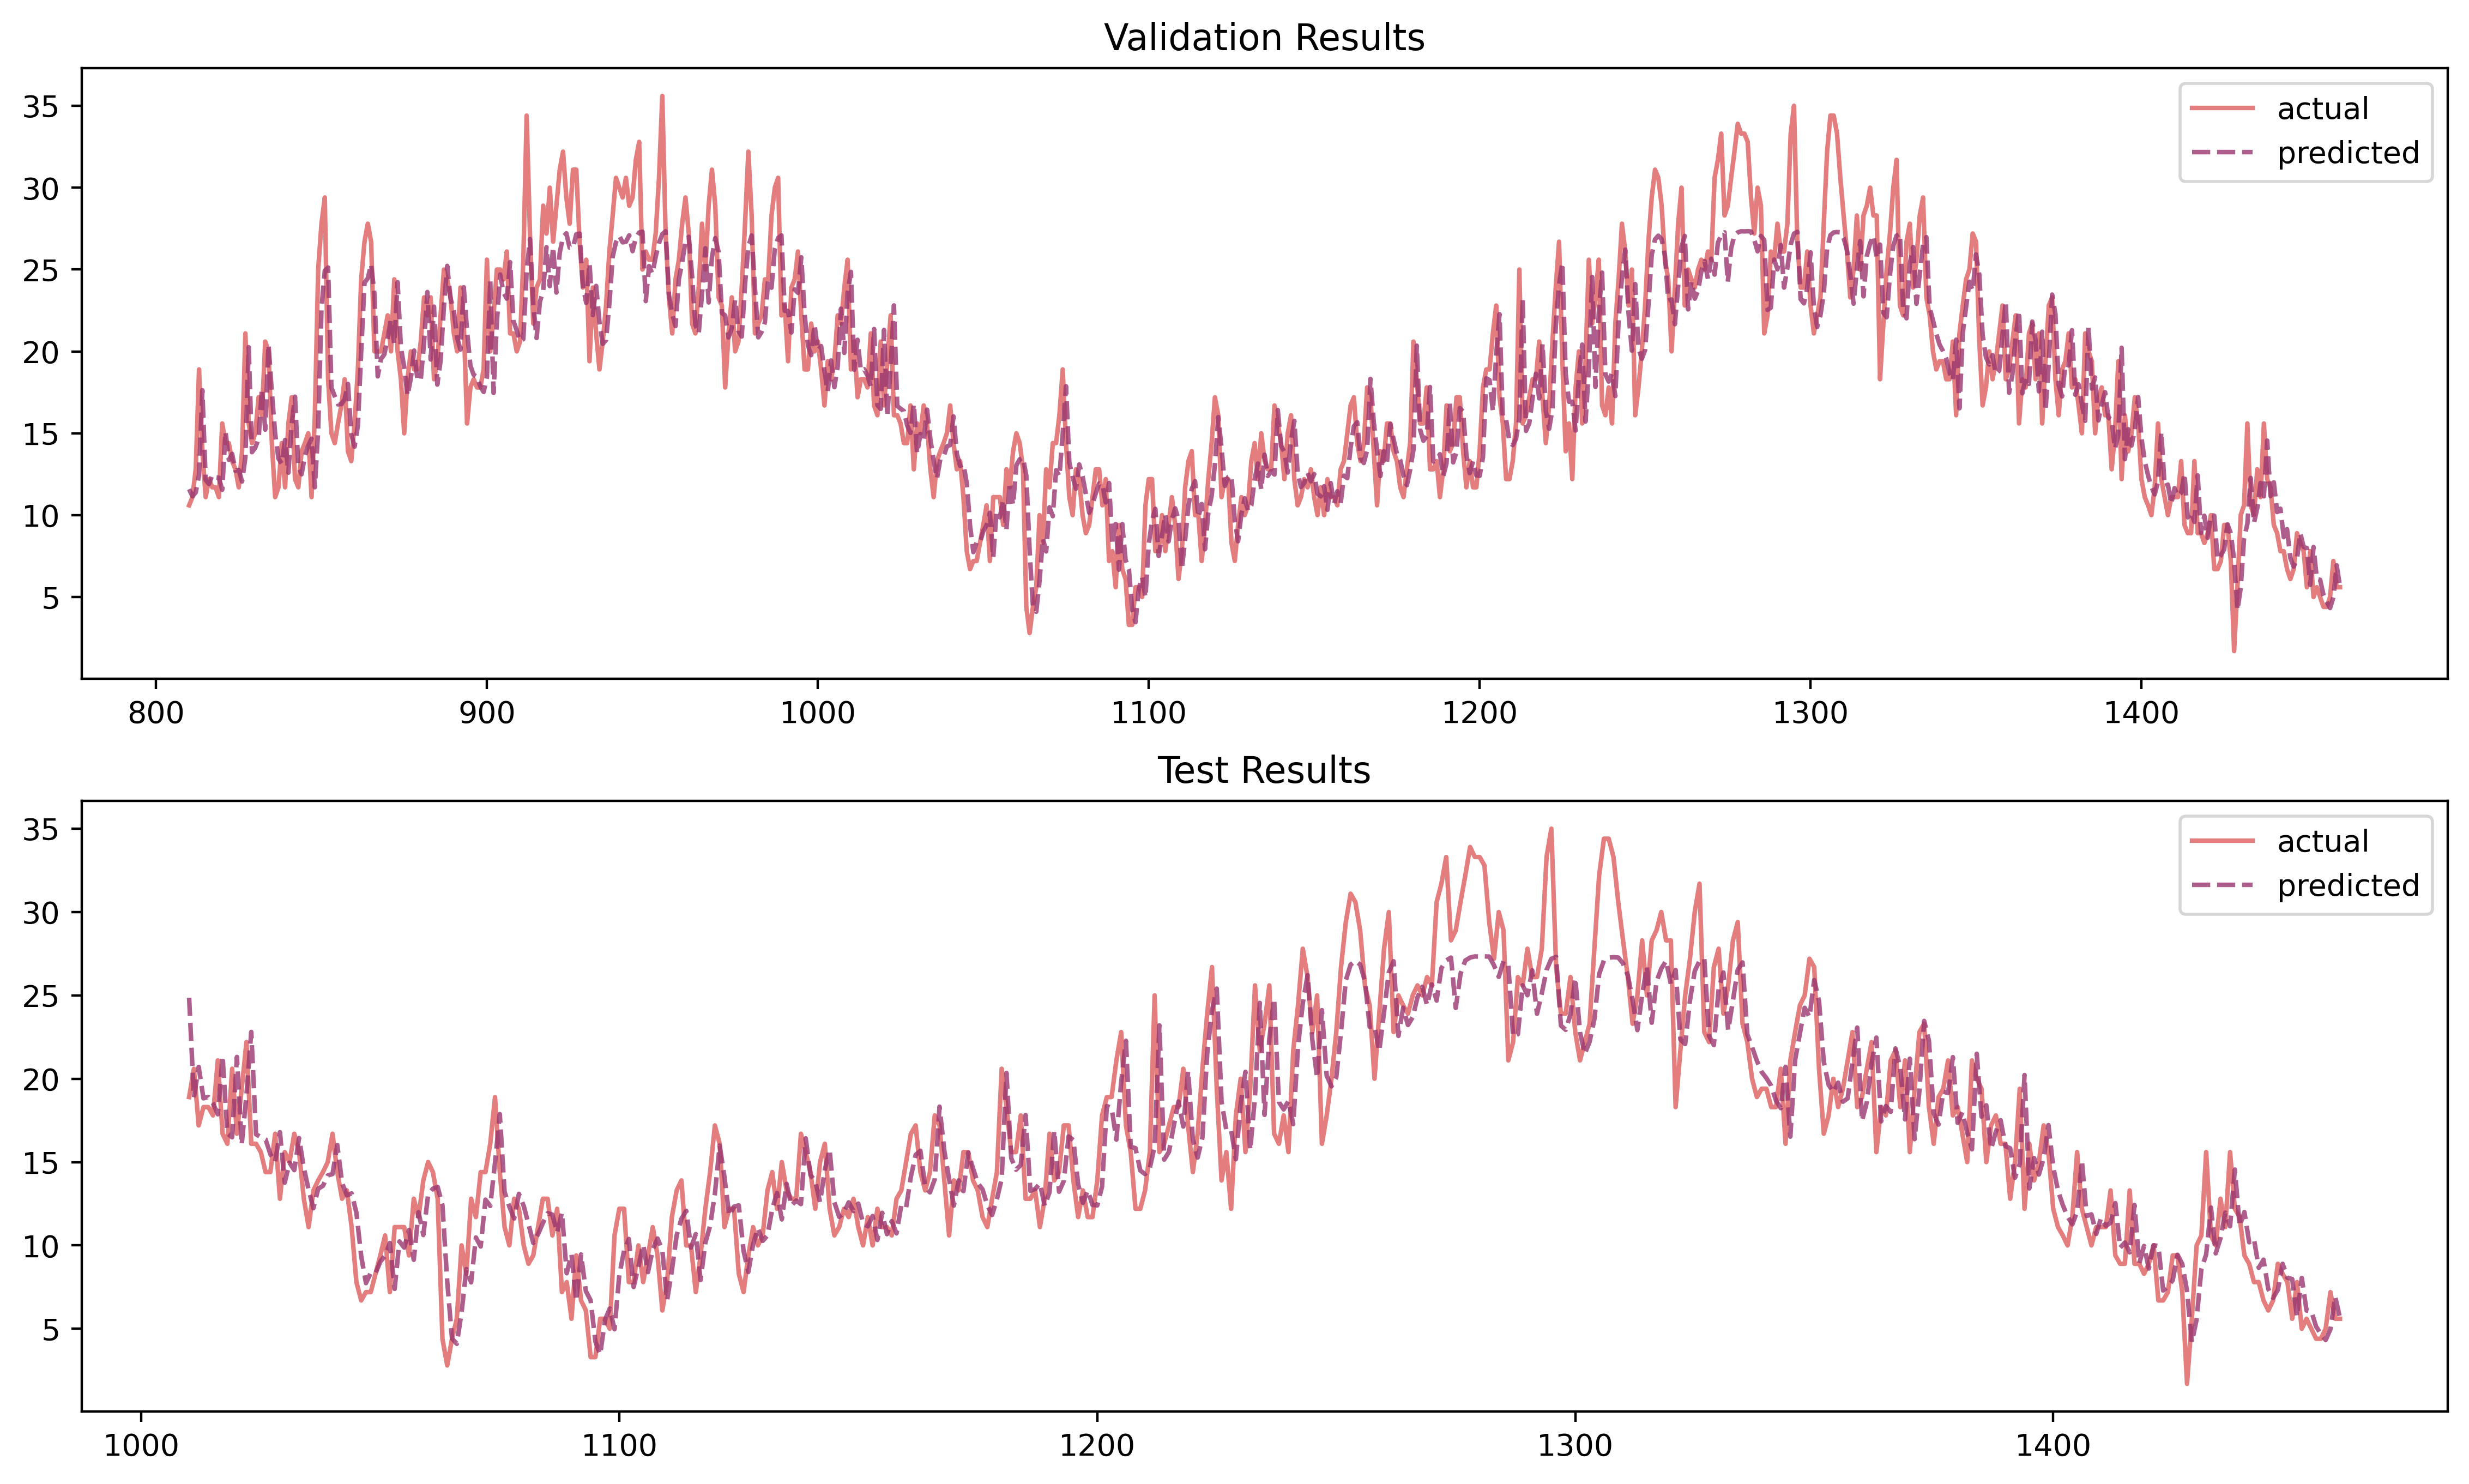

In [26]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df["temp_max"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[800:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[1000:],alpha=0.8,palette="flare",linestyle=None);